# ECSE 415 Assignment 3

**Important: This Notebook needs to be run sequentially**

In [1]:
## Imports ##
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
from torch.utils.data import DataLoader

from skimage.draw import line
from PIL import Image as im 

In [2]:
device = 7

## Path to Images ##
path = './images/A3/'

## Problem 1: Image Classification with Convolution Neural Network (CNN) and Naïve Bayes
* Load MNIST Dataset
* Implementation of CNN
* SGD Optimizer and Multi-Categories Cross Entropy
* Train CNN
* Test Accuracy of Trained CNN
* Naive Bayes Classifier

Referenced tutorial 7

#### Load MNIST Dataset

In [3]:
## Load Train and Test Data

# Transform
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))
                                ])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=32, shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)

#### Implementation of CNN
Batch size of 32

In [75]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.conv3 = nn.Conv2d(64, 64, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 64, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv3(x))

        x = x.view(-1, 64 * 64)
        x = self.fc1(x)
        return x


net = CNN().to(device)

#### SGD Optimizer and Multi-Categories Cross Entropy

In [76]:
# Create an instance of criterion and an optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001)

#### Train CNN

C:\Users\monaw\Desktop\'School Notes'\School_Notes_2025\'ECSE 415'\Assignment3.ipynb

In [77]:
epochs = 10

for epoch in range(epochs):

    total_loss = 0.0
    for i, data in enumerate(trainloader):
        imgs, labels = data
        imgs = imgs.to(device)
        labels = labels.to(device)

        # parameter gradients to zero
        optimizer.zero_grad()

        # step
        out = net(imgs)
        loss = criterion(out, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        total_loss += loss.item()
    print(f'EPOCH {epoch + 1}:')
    print('Total Loss: %.3f' %(total_loss))

print('Finished Training.')

EPOCH 1:
Total Loss: 3844.151
EPOCH 2:
Total Loss: 825.701
EPOCH 3:
Total Loss: 601.476
EPOCH 4:
Total Loss: 487.586
EPOCH 5:
Total Loss: 399.334
EPOCH 6:
Total Loss: 337.159
EPOCH 7:
Total Loss: 294.847
EPOCH 8:
Total Loss: 262.219
EPOCH 9:
Total Loss: 237.052
EPOCH 10:
Total Loss: 219.003
Finished Training.


#### Test Accuracy of Trained CNN

In [78]:
correct = 0
total = 0

net.eval()
with torch.no_grad():
    for data in testloader:
        imgs, labels = data

        # Move to GPU
        imgs = imgs.to(device)
        labels = labels.to(device)

        # Prediction
        outputs = net(imgs)
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()

print('Accuracy of the CNN on the %d test images: %.2f %%' % (len(testloader.dataset), 100 * correct / len(testloader.dataset)))

net.eval()
with torch.no_grad():
    ## Example Prediction
    print("## Example Prediction ##")
    classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

    dataiter = iter(testloader)
    images, labels = next(dataiter)
    images = images.to(device)

    outputs = net(images)
    print('GroundTruth: ', ' '.join('%1s' % classes[labels[j]] for j in range(8)))

    _, predicted = torch.max(outputs, 1)

    print('Predicted: ', ' '.join('%1s' % classes[predicted[j]] for j in range(8)))

Accuracy of the CNN on the 10000 test images: 97.19 %
## Example Prediction ##
GroundTruth:  7 2 1 0 4 1 4 9
Predicted:  7 2 1 0 4 1 4 9


### Classification Accuracy with different Batch Sizes
batch_size = 4, 8, 12, 16

In [61]:
# Batch Size of 4
trainloader4 = DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testloader4 = DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)
net4 = CNN().to(device)

# Batch Size of 8
trainloader8 = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
testloader8 = DataLoader(testset, batch_size=8, shuffle=False, num_workers=2)
net8 = CNN().to(device)

# Batch Size of 12
trainloader12 = DataLoader(trainset, batch_size=12, shuffle=True, num_workers=2)
testloader12 = DataLoader(testset, batch_size=12, shuffle=False, num_workers=2)
net12 = CNN().to(device)

# Batch Size of 16
trainloader16 = DataLoader(trainset, batch_size=16, shuffle=True, num_workers=2)
testloader16 = DataLoader(testset, batch_size=16, shuffle=False, num_workers=2)
net16 = CNN().to(device)

#### Batch Size of 4

In [62]:
optimizer = optim.SGD(net4.parameters(), lr=0.001)

epochs = 10
for epoch in range(epochs):

    total_loss = 0.0
    for i, data in enumerate(trainloader4):
        imgs, labels = data
        imgs = imgs.to(device)
        labels = labels.to(device)

        # parameter gradients to zero
        optimizer.zero_grad()

        # step
        out = net4(imgs)
        loss = criterion(out, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        total_loss += loss.item()
    print(f'EPOCH {epoch + 1}:')
    print('Total Loss: %.3f' %(total_loss))

print('Finished Training.')

EPOCH 1:
Total Loss: 8395.322
EPOCH 2:
Total Loss: 1735.011
EPOCH 3:
Total Loss: 1154.130
EPOCH 4:
Total Loss: 911.597
EPOCH 5:
Total Loss: 769.857
EPOCH 6:
Total Loss: 673.968
EPOCH 7:
Total Loss: 592.916
EPOCH 8:
Total Loss: 538.737
EPOCH 9:
Total Loss: 490.460
EPOCH 10:
Total Loss: 444.952
Finished Training.


#### Batch Size of 8

In [121]:
optimizer = optim.SGD(net8.parameters(), lr=0.001)

epochs = 10
for epoch in range(epochs):

    total_loss = 0.0
    for i, data in enumerate(trainloader8):
        imgs, labels = data
        imgs = imgs.to(device)
        labels = labels.to(device)

        # parameter gradients to zero
        optimizer.zero_grad()

        # step
        out = net8(imgs)
        loss = criterion(out, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        total_loss += loss.item()
    print(f'EPOCH {epoch + 1}:')
    print('Total Loss: %.3f' %(total_loss))

print('Finished Training.')

EPOCH 1:
Total Loss: 5614.993
EPOCH 2:
Total Loss: 1371.477
EPOCH 3:
Total Loss: 875.737
EPOCH 4:
Total Loss: 689.388
EPOCH 5:
Total Loss: 581.608
EPOCH 6:
Total Loss: 505.219
EPOCH 7:
Total Loss: 457.368
EPOCH 8:
Total Loss: 417.535
EPOCH 9:
Total Loss: 381.445
EPOCH 10:
Total Loss: 350.623
Finished Training.


#### Batch Size of 12

In [122]:
optimizer = optim.SGD(net12.parameters(), lr=0.001)

epochs = 10
for epoch in range(epochs):

    total_loss = 0.0
    for i, data in enumerate(trainloader12):
        imgs, labels = data
        imgs = imgs.to(device)
        labels = labels.to(device)

        # parameter gradients to zero
        optimizer.zero_grad()

        # step
        out = net12(imgs)
        loss = criterion(out, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        total_loss += loss.item()
    print(f'EPOCH {epoch + 1}:')
    print('Total Loss: %.3f' %(total_loss))

print('Finished Training.')

EPOCH 1:
Total Loss: 6298.418
EPOCH 2:
Total Loss: 1580.952
EPOCH 3:
Total Loss: 994.082
EPOCH 4:
Total Loss: 664.729
EPOCH 5:
Total Loss: 514.113
EPOCH 6:
Total Loss: 429.977
EPOCH 7:
Total Loss: 379.102
EPOCH 8:
Total Loss: 343.013
EPOCH 9:
Total Loss: 313.433
EPOCH 10:
Total Loss: 291.630
Finished Training.


#### Batch Size of 16

In [123]:
optimizer = optim.SGD(net16.parameters(), lr=0.001)

epochs = 10
for epoch in range(epochs):

    total_loss = 0.0
    for i, data in enumerate(trainloader16):
        imgs, labels = data
        imgs = imgs.to(device)
        labels = labels.to(device)

        # parameter gradients to zero
        optimizer.zero_grad()

        # step
        out = net16(imgs)
        loss = criterion(out, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        total_loss += loss.item()
    print(f'EPOCH {epoch + 1}:')
    print('Total Loss: %.3f' %(total_loss))

print('Finished Training.')

EPOCH 1:
Total Loss: 5673.261
EPOCH 2:
Total Loss: 1372.609
EPOCH 3:
Total Loss: 1031.035
EPOCH 4:
Total Loss: 721.308
EPOCH 5:
Total Loss: 511.759
EPOCH 6:
Total Loss: 400.999
EPOCH 7:
Total Loss: 339.095
EPOCH 8:
Total Loss: 299.284
EPOCH 9:
Total Loss: 272.793
EPOCH 10:
Total Loss: 251.981
Finished Training.


#### Testing Accuracy of Different Batches
Batch size of 4, 8, 12, 16

In [124]:
## Batch Size of 4 ##
correct4 = 0
with torch.no_grad():
    for data in testloader4:
        imgs, labels = data

        # Move to GPU
        imgs = imgs.to(device)
        labels = labels.to(device)

        # Prediction
        outputs = net4(imgs)
        _, predicted = torch.max(outputs.data, 1)
        correct4 += (predicted == labels).sum().item()


## Batch Size of 8 ##
correct8 = 0
with torch.no_grad():
    for data in testloader8:
        imgs, labels = data

        # Move to GPU
        imgs = imgs.to(device)
        labels = labels.to(device)

        # Prediction
        outputs = net8(imgs)
        _, predicted = torch.max(outputs.data, 1)
        correct8 += (predicted == labels).sum().item()


## Batch Size of 12 ##
correct12 = 0
with torch.no_grad():
    for data in testloader12:
        imgs, labels = data

        # Move to GPU
        imgs = imgs.to(device)
        labels = labels.to(device)

        # Prediction
        outputs = net12(imgs)
        _, predicted = torch.max(outputs.data, 1)
        correct12 += (predicted == labels).sum().item()


## Batch Size of 16 ##
correct16 = 0
with torch.no_grad():
    for data in testloader16:
        imgs, labels = data

        # Move to GPU
        imgs = imgs.to(device)
        labels = labels.to(device)

        # Prediction
        outputs = net16(imgs)
        _, predicted = torch.max(outputs.data, 1)
        correct16 += (predicted == labels).sum().item()

print('Accuracy of the CNN with Batch Size of 4 on the %d test images: %.2f %%' % (len(testloader4.dataset), 100 * correct4 / len(testloader4.dataset)))
print('Accuracy of the CNN with Batch Size of 8 on the %d test images: %.2f %%' % (len(testloader8.dataset), 100 * correct8 / len(testloader8.dataset)))
print('Accuracy of the CNN with Batch Size of 12 on the %d test images: %.2f %%' % (len(testloader12.dataset), 100 * correct12 / len(testloader12.dataset)))
print('Accuracy of the CNN with Batch Size of 16 on the %d test images: %.2f %%' % (len(testloader16.dataset), 100 * correct16 / len(testloader16.dataset)))

Accuracy of the CNN with Batch Size of 4 on the 10000 test images: 98.68 %
Accuracy of the CNN with Batch Size of 8 on the 10000 test images: 98.38 %
Accuracy of the CNN with Batch Size of 12 on the 10000 test images: 98.20 %
Accuracy of the CNN with Batch Size of 16 on the 10000 test images: 98.11 %


### Different Activation Functions
* Log Sigmoid
* Tanh

#### Log Sigmoid

In [125]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.conv3 = nn.Conv2d(64, 64, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 64, 10)

    def forward(self, x):
        x = F.logsigmoid(self.conv1(x))
        x = self.pool(F.logsigmoid(self.conv2(x)))
        x = F.logsigmoid(self.conv3(x))
        x = F.logsigmoid(self.conv3(x))

        x = x.view(-1, 64 * 64)
        x = self.fc1(x)
        return x


sigmoid_net = CNN().to(device)

In [126]:
optimizer = optim.SGD(sigmoid_net.parameters(), lr=0.001)

# Training Loop
epochs = 10
for epoch in range(epochs):

    total_loss = 0.0
    for i, data in enumerate(trainloader):
        imgs, labels = data
        imgs = imgs.to(device)
        labels = labels.to(device)

        # parameter gradients to zero
        optimizer.zero_grad()

        # step
        out = sigmoid_net(imgs)
        loss = criterion(out, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        total_loss += loss.item()
    print(f'EPOCH {epoch + 1}:')
    print('Total Loss: %.3f' %(total_loss))

print('Finished Training.')

# Testing Loop
correct_sigmoid = 0
with torch.no_grad():
    for data in testloader:
        imgs, labels = data

        # Move to GPU
        imgs = imgs.to(device)
        labels = labels.to(device)

        # Prediction
        outputs = sigmoid_net(imgs)
        _, predicted = torch.max(outputs.data, 1)
        correct_sigmoid += (predicted == labels).sum().item()

print('Accuracy of the CNN with Batch Size of 32 and Log Sigmoid activation function on the %d test images: %.2f %%' % (len(testloader.dataset), 100 * correct_sigmoid / len(testloader.dataset)))

EPOCH 1:
Total Loss: 4338.351
EPOCH 2:
Total Loss: 4223.010
EPOCH 3:
Total Loss: 1205.471
EPOCH 4:
Total Loss: 731.976
EPOCH 5:
Total Loss: 643.763
EPOCH 6:
Total Loss: 539.443
EPOCH 7:
Total Loss: 418.863
EPOCH 8:
Total Loss: 330.491
EPOCH 9:
Total Loss: 276.972
EPOCH 10:
Total Loss: 241.411
Finished Training.
Accuracy of the CNN with Batch Size of 32 and Log Sigmoid activation function on the 10000 test images: 96.65 %


#### Tanh

In [127]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.conv3 = nn.Conv2d(64, 64, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 64, 10)

    def forward(self, x):
        x = F.tanh(self.conv1(x))
        x = self.pool(F.tanh(self.conv2(x)))
        x = F.tanh(self.conv3(x))
        x = F.tanh(self.conv3(x))

        x = x.view(-1, 64 * 64)
        x = self.fc1(x)
        return x


tanh_net = CNN().to(device)

In [128]:
optimizer = optim.SGD(tanh_net.parameters(), lr=0.001)

# Training Loop
epochs = 10
for epoch in range(epochs):

    total_loss = 0.0
    for i, data in enumerate(trainloader):
        imgs, labels = data
        imgs = imgs.to(device)
        labels = labels.to(device)

        # parameter gradients to zero
        optimizer.zero_grad()

        # step
        out = tanh_net(imgs)
        loss = criterion(out, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        total_loss += loss.item()
    print(f'EPOCH {epoch + 1}:')
    print('Total Loss: %.3f' %(total_loss))

print('Finished Training.')

# Testing Loop
correct_tanh = 0
with torch.no_grad():
    for data in testloader:
        imgs, labels = data

        # Move to GPU
        imgs = imgs.to(device)
        labels = labels.to(device)

        # Prediction
        outputs = tanh_net(imgs)
        _, predicted = torch.max(outputs.data, 1)
        correct_tanh += (predicted == labels).sum().item()

print('Accuracy of the CNN with Batch Size of 32 and Tanh activation function on the %d test images: %.2f %%' % (len(testloader.dataset), 100 * correct_tanh / len(testloader.dataset)))

EPOCH 1:
Total Loss: 2003.789
EPOCH 2:
Total Loss: 761.657
EPOCH 3:
Total Loss: 661.157
EPOCH 4:
Total Loss: 602.289
EPOCH 5:
Total Loss: 553.901
EPOCH 6:
Total Loss: 511.268
EPOCH 7:
Total Loss: 470.163
EPOCH 8:
Total Loss: 432.152
EPOCH 9:
Total Loss: 396.934
EPOCH 10:
Total Loss: 365.200
Finished Training.
Accuracy of the CNN with Batch Size of 32 and Tanh activation function on the 10000 test images: 95.01 %


### Recognize Digits
**Preprocessing Steps:** Convert into grayscale, inverse binarized, convert binarized image into PIL Image and applied transforms.

Used CNN with batch 32 and ReLU activation function for prediction

In [9]:
## Preprocessing of Images ##
test1 = cv.cvtColor(cv.imread(os.path.join(path, 'test1.png')), cv.COLOR_BGR2GRAY)
test2 = cv.cvtColor(cv.imread(os.path.join(path, 'test2.png')), cv.COLOR_BGR2GRAY)
test3 = cv.cvtColor(cv.imread(os.path.join(path, 'test3.png')), cv.COLOR_BGR2GRAY)

_, thresh1 = cv.threshold(test1, 250, 255, cv.THRESH_BINARY_INV)
_, thresh2 = cv.threshold(test2, 250, 255, cv.THRESH_BINARY_INV)
_, thresh3 = cv.threshold(test3, 250, 255, cv.THRESH_BINARY_INV)

test1 = im.fromarray(cv.resize(thresh1, (28, 28)))
test2 = im.fromarray(cv.resize(thresh2, (28, 28)))
test3 = im.fromarray(cv.resize(thresh3, (28, 28)))

test1 = transform(test1).to(device)
test2 = transform(test2).to(device)
test3 = transform(test3).to(device)

classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

net.eval()
with torch.no_grad():
    ## test1.png ##
    print('test1.png')
    output1 = net(test1)
    print('GroundTruth: 3')

    _, predicted = torch.max(output1, 1)
    print('Predicted: ', classes[predicted])
    print()


    ## test2.png ##
    print('test2.png')
    output2 = net(test2)
    print('GroundTruth: 8')

    _, predicted = torch.max(output2, 1)
    print('Predicted: ', classes[predicted])
    print()


    ## test3.png ##
    print('test3.png')
    output3 = net(test3)
    print('GroundTruth: 7')

    _, predicted = torch.max(output3, 1)
    print('Predicted: ', classes[predicted])

test1.png
GroundTruth: 3
Predicted:  3

test2.png
GroundTruth: 8
Predicted:  4

test3.png
GroundTruth: 7
Predicted:  0


## Answers to Questions
1. Discuss the changes in accuracy with variation in batch sizes and activation functions
* As the results have shown, from a batch size of 4, to 8, 12, 16, ending with 32, there is a decrease in prediction accuracy as batch size increases. This could be due to that more images in a single batch may cause model to overfit and over-generalize, thus performing poorly due to that.

---
* ReLU is usually the activation function of choice when it comes to layers in a network, but I investigated the effects of Log Sigmoid and Tanh activation functions on the classification accuracies of the CNN model. Both models did not perform as good as the CNN with ReLU (96.87%), but Log Sigmoid (96.65%) performed better than Tanh (95.01%).

### Naive Bayes Classifier

#### Likelihood
Probability of a pixel having intensity of 1 given the label of the image.

In [ ]:
likelihood = {}
for (img, label) in trainset:
    img = img.squeeze(0)
    img = img > -1
    img = img.float()
    img = img.flatten()

    if not (label in likelihood.keys()):
        likelihood[label] = img
    else:
        likelihood[label] += img
    
# Compute likelihood (between 0-1) for each pixel
for label in likelihood.keys():
    likelihood[label] = likelihood[label] / len(trainset)
    likelihood[label] = np.where(likelihood[label] == 0, likelihood[label]+0.000000001, likelihood[label]) # prevent zeroing of the likelihood

#### Posterior Odd

In [111]:
def posterior(img_set):
    count = 0
    for (img, real_label) in img_set:
        img = img.squeeze(0)
        img = img > -1
        img = img.float()
        img = img.flatten()

        ## Calculate Posterior ##
        posterior = {}

        for label in likelihood.keys():
            posterior[label] = np.where(img == 0, 1-likelihood[label], likelihood[label]) # getting the odd of getting 0 or 1 (depends on the original img) given label
            posterior[label] = 1/9 * np.sum(np.log(posterior[label])) # summed log transformed posterior and multiplied by prior odd
        
        # predict
        val = max(posterior.values())
        label = [label for label in posterior if posterior[label] == val]
        if label[0] == real_label:
            count += 1
    
    print("Accuracy of Naive Bayes Classifier is", count/len(img_set))
posterior(testset)

Accuracy of Naive Bayes Classifier is 0.6901


#### Testing on test1.png, test2.png, and test3.png

In [104]:
## Load Images ##
test1 = cv.resize(cv.cvtColor(cv.imread(os.path.join(path, 'test1.png')), cv.COLOR_BGR2GRAY), (28, 28))
test2 = cv.resize(cv.cvtColor(cv.imread(os.path.join(path, 'test2.png')), cv.COLOR_BGR2GRAY), (28, 28))
test3 = cv.resize(cv.cvtColor(cv.imread(os.path.join(path, 'test3.png')), cv.COLOR_BGR2GRAY), (28, 28))

_, thresh1 = cv.threshold(test1, 252, 255, cv.THRESH_BINARY_INV)
_, thresh2 = cv.threshold(test2, 252, 255, cv.THRESH_BINARY_INV)
_, thresh3 = cv.threshold(test3, 252, 255, cv.THRESH_BINARY_INV)
thresh1 = thresh1.flatten()
thresh2 = thresh2.flatten()
thresh3 = thresh3.flatten()

## Calculate Posterior ##
posterior = {}
for label in likelihood.keys():
    posterior[label] = np.where(thresh1 == 0, 1-likelihood[label], likelihood[label])
    posterior[label] = 1/9 * np.sum(np.log(posterior[label]))
val = max(posterior.values())
label = [label for label in posterior if posterior[label] == val]
print("I think 3 is a", label[0])

posterior = {}
for label in likelihood.keys():
    posterior[label] = np.where(thresh2 == 0, 1-likelihood[label], likelihood[label])
    posterior[label] = 1/9 * np.sum(np.log(posterior[label]))
val = max(posterior.values())
label = [label for label in posterior if posterior[label] == val]
print("I think 8 is a", label[0])

posterior = {}
for label in likelihood.keys():
    posterior[label] = np.where(thresh3 == 0, 1-likelihood[label], likelihood[label])
    posterior[label] = 1/9 * np.sum(np.log(posterior[label]))
val = max(posterior.values())
label = [label for label in posterior if posterior[label] == val]
print("I think 7 is a", label[0])

I think 3 is a 6
I think 8 is a 9
I think 7 is a 6


### Naive Bayes Classifier with Non-Linear Prior Odds

#### Non-Linear Prior Odd

In [106]:
prior = {}

# Count the number of samples each label have
for (_, label) in trainset:
    if not (label in prior.keys()):
        prior[label] = 1
    else:
        prior[label] += 1
    
# Find Prior Odd by dividing over entire dataset
for label in prior.keys():
    prior[label] = prior[label] / len(trainset)

print(prior)

{5: 0.09035, 0: 0.09871666666666666, 4: 0.09736666666666667, 1: 0.11236666666666667, 9: 0.09915, 2: 0.0993, 3: 0.10218333333333333, 6: 0.09863333333333334, 7: 0.10441666666666667, 8: 0.09751666666666667}


#### Posterior Odd

In [ ]:
def posterior(img_set):
    count = 0
    print("Reporting Logged Normalized Posterior Odds:")
    for (img, real_label) in img_set:
        img = img.squeeze(0)
        img = img > -1
        img = img.float()
        img = img.flatten()

        ## Calculate Posterior ##
        posterior = {}

        for label in likelihood.keys():
            posterior[label] = np.where(img == 0, 1-likelihood[label], likelihood[label]) # getting the odd of getting 0 or 1 (depends on the original img) given label
            posterior[label] = prior[label] * np.sum(np.log(posterior[label])) # summed log transformed posterior and multiplied by prior odd
        
        # predict
        val = max(posterior.values())
        label = [label for label in posterior if posterior[label] == val]
        if label[0] == real_label:
            count += 1
        
        print(posterior)
    
    print("Accuracy of Naive Bayes Classifier with Varying Prior is", count/len(img_set))
posterior(testset)

Reporting Logged Normalized Posterior Odds:
{5: -37.67690952758789, 0: -42.33107317911784, 4: -38.88649592081706, 1: -62.637722949218755, 9: -35.88704415435791, 2: -43.92858297729492, 3: -40.037998304239906, 6: -50.428594355265304, 7: -33.54802535247803, 8: -37.67420176645915}
{5: -57.68538686523438, 0: -60.61308774108886, 4: -70.03171190592448, 1: -85.25017724405924, 9: -77.1340947052002, 2: -52.49806873168945, 3: -60.98058598022461, 6: -58.29174615071615, 7: -89.17162939453125, 8: -60.88112394002279}
{5: -18.876256842041016, 0: -23.661408618418374, 4: -21.779428424580892, 1: -18.827172509257, 9: -22.02026549835205, 2: -19.33469609069824, 3: -20.16346158803304, 6: -21.024407779947918, 7: -24.815525174458823, 8: -18.183254430643718}
{5: -57.47112545776367, 0: -52.39828127034505, 4: -64.48404639485678, 1: -104.99956535847983, 9: -67.00486074829102, 2: -61.806370971679684, 3: -62.53117315877279, 6: -60.304386287434895, 7: -73.53583263142905, 8: -59.38197779642741}
{5: -37.85235418395996,

### Detect Two Digits with CNN

#### Preprocessing

The labels used here are: [0 1 2]


(<matplotlib.image.AxesImage at 0x7f17a05137f0>, ([], []), ([], []))

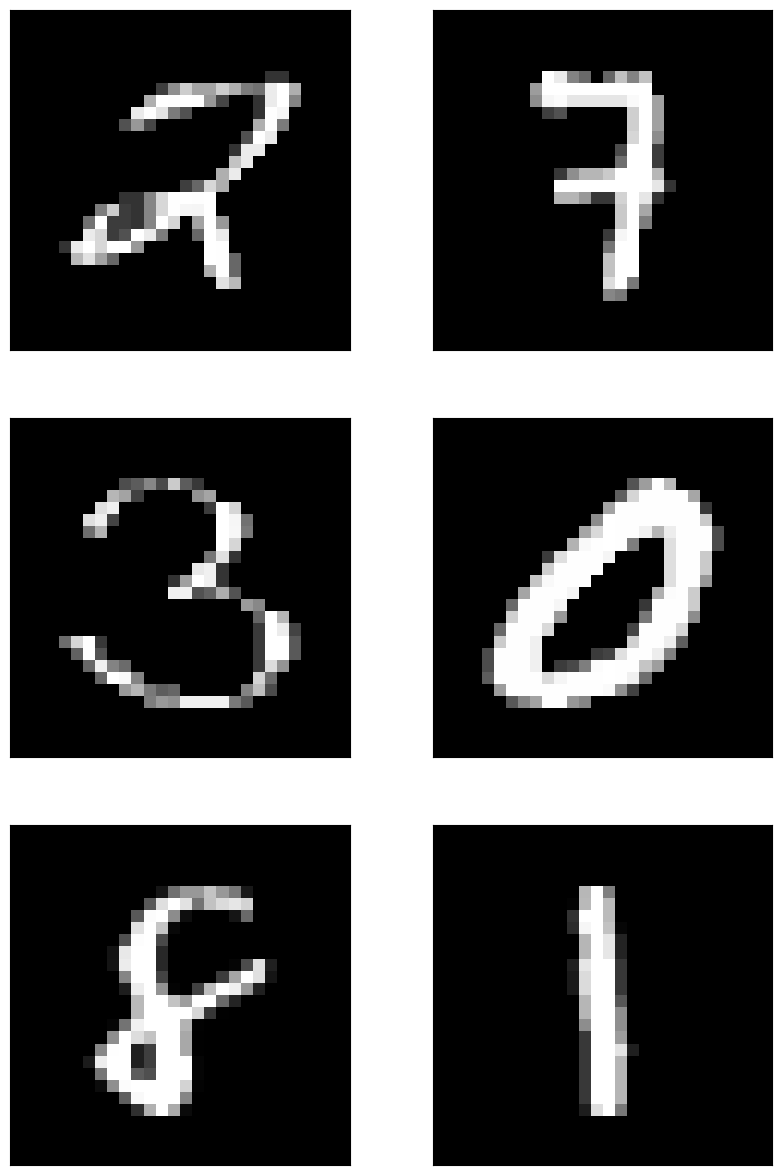

In [87]:
def preprocess(label, img):
    # separate the two digits in the image
    img11 = np.zeros((64, 64)) # for first digit
    img12 = np.zeros((64, 64)) # for second digit
    img11 = np.where(label == 1, img, img11)
    img12 = np.where(label == 2, img, img12)
    return img11, img12

def crop(img):
    img = np.uint8(img)
    x, y, w, h = cv.boundingRect(img)
    crop = img[y:y+h,x:x+w] # crop according to bounding box
    
    if crop.shape[0] < 28 or crop.shape[1] < 28:
        #get pad width and height
        w = (28 - crop.shape[0]) // 2
        ww = 28 - w - crop.shape[0]
        h = (28 - crop.shape[1]) // 2
        hh = 28 - h - crop.shape[1]
        padded = np.pad(crop,  pad_width=((w, ww), (h, hh)), constant_values=0) # pad to 28x28
    else:
        padded = im.fromarray(cv.resize(crop, (28, 28)))
    padded = cv.erode(padded, (3,3), iterations=1)
    return padded # 28x28 digit


detect1 = cv.imread(os.path.join('.', 'detect1.png'), cv.IMREAD_GRAYSCALE)
detect2 = cv.imread(os.path.join('.', 'detect2.png'), cv.IMREAD_GRAYSCALE)
detect3 = cv.imread(os.path.join('.', 'detect3.png'), cv.IMREAD_GRAYSCALE)

_, img1 = cv.threshold(detect1, 50, 255, cv.THRESH_BINARY)
_, img2 = cv.threshold(detect2, 50, 255, cv.THRESH_BINARY)
_, img3 = cv.threshold(detect3, 50, 255, cv.THRESH_BINARY)

# Each object is labeled 1 or 2, and the background is 0
# Centroid[label][coord] <-- need to map to int
_, label1 = cv.connectedComponents(img1, connectivity=8)
_, label2 = cv.connectedComponents(img2, connectivity=8)
_, label3 = cv.connectedComponents(detect3, connectivity=8)

print("The labels used here are:", np.unique(label1))

## Preprocess ##
img11, img12 = preprocess(label1, detect1) # first img
img21, img22 = preprocess(label2, detect2) # second img
img31, img32 = preprocess(label3, detect3) # third img

# Get 28x28 bounding box around digit
# first img
digit11 = crop(img11)
digit12 = crop(img12)
# second img
digit21 = crop(img21)
digit22 = crop(img22)
# third img
digit31 = crop(img31)
digit32 = crop(img32)

figure = plt.figure(figsize=(10, 15))
plt.subplot(321)
plt.imshow(digit11, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.subplot(322)
plt.imshow(digit12, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.subplot(323)
plt.imshow(digit21, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.subplot(324)
plt.imshow(digit22, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.subplot(325)
plt.imshow(digit31, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.subplot(326)
plt.imshow(digit32, cmap='gray'), plt.xticks([]), plt.yticks([])

#### Prediction

In [82]:
classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')


with torch.no_grad():
    ## detect1.png ##
    print('detect1.png')
    digit1_1 = transform(digit11).to(device)
    digit1_2 = transform(digit12).to(device)
    output1 = net(digit1_1)
    output2 = net(digit1_2)
    print('GroundTruth: 2 & 7')

    _, predicted1 = torch.max(output1, 1)
    _, predicted2 = torch.max(output2, 1)
    print(f'Predicted: {classes[predicted1]} & {classes[predicted2]}')


    ## detect2.png ##
    print('detect2.png')
    digit2_1 = transform(digit21).to(device)
    digit2_2 = transform(digit22).to(device)
    output3 = net(digit2_1)
    output4 = net(digit2_2)
    print('GroundTruth: 3 & 0')

    _, predicted3 = torch.max(output3, 1)
    _, predicted4 = torch.max(output4, 1)
    print(f'Predicted: {classes[predicted3]} & {classes[predicted4]}')


    ## detect3.png ##
    print('detect2.png')
    digit3_1 = transform(digit31).to(device)
    digit3_2 = transform(digit32).to(device)
    output5 = net(digit3_1)
    output6 = net(digit3_2)
    print('GroundTruth: 8 & 1')

    _, predicted5 = torch.max(output5, 1)
    _, predicted6 = torch.max(output6, 1)
    print(f'Predicted: {classes[predicted5]} & {classes[predicted6]}')

detect1.png
GroundTruth: 2 & 7
Predicted: 2 & 3
detect2.png
GroundTruth: 3 & 0
Predicted: 3 & 0
detect2.png
GroundTruth: 8 & 1
Predicted: 8 & 1


In [70]:
## With Batch Size of 4 Model ##
output2 = net4(digit1_2)
print('GroundTruth: 7')
_, predicted2 = torch.max(output2, 1)
print(f'Predicted: {classes[predicted2]}')

GroundTruth: 7
Predicted: 7


## Answers to Questions
1. Explain your results in two digits detection
* The connected components of the image was found, and by the image patterns, there are three classes. I isolated the two non-background classes and copied them into two separate 64x64 images. Then, I found the bounding box of the digits, centered them, and cropped the images to be 28x28. I used the CNN that was trained on a batch size of 32 for the prediction, and predicted all digits correctly except '7'. I looked into the MNIST dataset and found that the majority of the '7's do not have the dash in the middle; and since the batch size is 32, the model tends to generalize, which is why potentially the model performs poorly on '7'. The '7' with a dash also looks similar to a '3', which is what the model predicted.

* If I use the model that was trained on a batch size of 4, the best performing model, then the model predicts '7' correctly. The model was trained on smaller batch size, and paid more attention to the images of '7' with the dash in the middle.
---
1. Discuss the limitations of your CNN in the context where you CNN will fail to recognize digits. Show any one example.
* The above was an example, another example of which I tested was when the digit imgs are binary. I find that the CNN was unable to differentiate any digits. This is due to the fact that MNIST dataset do not contain binary images; instead, the stroke gradient of each digit was recorded. This means that the CNN perhaps trained on the stroke gradient of the digits. Please look at the code below (similar code to before except the digits are binarized). '1' was predicted for all samples.

In [ ]:
def preprocess(label):
    # separate the two digits in the image
    img11 = np.zeros((64, 64)) # for first digit
    img12 = np.zeros((64, 64)) # for second digit
    img11 = np.where(label == 1, 255, img11)
    img12 = np.where(label == 2, 255, img12)
    return img11, img12

def crop(img):
    img = np.uint8(img)
    x, y, w, h = cv.boundingRect(img)
    crop = img[y:y+h,x:x+w] # crop according to bounding box
    
    if crop.shape[0] < 28 or crop.shape[1] < 28:
        #get pad width and height
        w = (28 - crop.shape[0]) // 2
        ww = 28 - w - crop.shape[0]
        h = (28 - crop.shape[1]) // 2
        hh = 28 - h - crop.shape[1]
        padded = np.pad(crop,  pad_width=((w, ww), (h, hh)), constant_values=0) # pad to 28x28
    else:
        padded = im.fromarray(cv.resize(crop, (28, 28)))
    padded = cv.erode(padded, (3,3), iterations=1)
    return padded # 28x28 digit


detect1 = cv.imread(os.path.join('.', 'detect1.png'), cv.IMREAD_GRAYSCALE)
detect2 = cv.imread(os.path.join('.', 'detect2.png'), cv.IMREAD_GRAYSCALE)
detect3 = cv.imread(os.path.join('.', 'detect3.png'), cv.IMREAD_GRAYSCALE)

_, img1 = cv.threshold(detect1, 50, 255, cv.THRESH_BINARY)
_, img2 = cv.threshold(detect2, 50, 255, cv.THRESH_BINARY)
_, img3 = cv.threshold(detect3, 50, 255, cv.THRESH_BINARY)

# Each object is labeled 1 or 2, and the background is 0
# Centroid[label][coord] <-- need to map to int
_, label1 = cv.connectedComponents(img1, connectivity=8)
_, label2 = cv.connectedComponents(img2, connectivity=8)
_, label3 = cv.connectedComponents(detect3, connectivity=8)

print("The labels used here are:", np.unique(label1))

## Preprocess ##
img11, img12 = preprocess(detect1) # first img
img21, img22 = preprocess(detect2) # second img
img31, img32 = preprocess(detect3) # third img

# Get 28x28 bounding box around digit
# first img
digit11 = crop(img11)
digit12 = crop(img12)
# second img
digit21 = crop(img21)
digit22 = crop(img22)
# third img
digit31 = crop(img31)
digit32 = crop(img32)


classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
net.eval()
with torch.no_grad():
    ## detect1.png ##
    print('detect1.png')
    digit1_1 = transform(digit11).to(device)
    digit1_2 = transform(digit12).to(device)
    output1 = net(digit1_1)
    output2 = net(digit1_2)
    print('GroundTruth: 2 & 7')

    _, predicted1 = torch.max(output1, 1)
    _, predicted2 = torch.max(output2, 1)
    print(f'Predicted: {classes[predicted1]} & {classes[predicted2]}')


    ## detect2.png ##
    print('detect2.png')
    digit2_1 = transform(digit21).to(device)
    digit2_2 = transform(digit22).to(device)
    output3 = net(digit2_1)
    output4 = net(digit2_2)
    print('GroundTruth: 3 & 0')

    _, predicted3 = torch.max(output3, 1)
    _, predicted4 = torch.max(output4, 1)
    print(f'Predicted: {classes[predicted3]} & {classes[predicted4]}')


    ## detect3.png ##
    print('detect2.png')
    digit3_1 = transform(digit31).to(device)
    digit3_2 = transform(digit32).to(device)
    output5 = net(digit3_1)
    output6 = net(digit3_2)
    print('GroundTruth: 8 & 1')

    _, predicted5 = torch.max(output5, 1)
    _, predicted6 = torch.max(output6, 1)
    print(f'Predicted: {classes[predicted5]} & {classes[predicted6]}')

The labels used here are: [0 1 2]
detect1.png
GroundTruth: 2 & 7
Predicted: 1 & 1
detect2.png
GroundTruth: 3 & 0
Predicted: 1 & 1
detect2.png
GroundTruth: 8 & 1
Predicted: 1 & 1


## Problem 2: Stereo Vision - Epipolar Geometry
* SIFT Keypoint Matching
* Draw epipolar lines
* Extract and match patches

#### SIFT Keypoint Matching

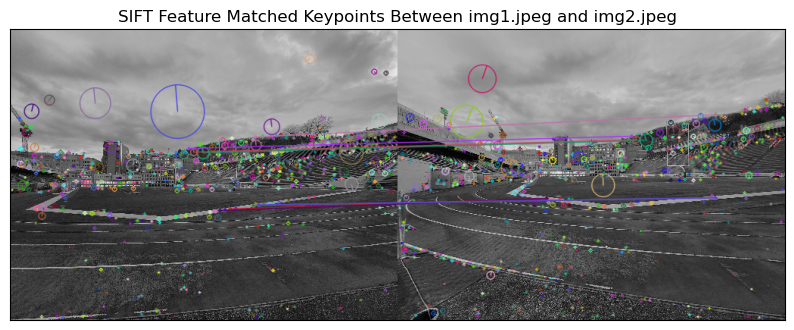

In [39]:
## Load Image ##
img1 = cv.cvtColor(cv.imread(os.path.join(path, 'img1.jpeg')), cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(cv.imread(os.path.join(path, 'img2.jpeg')), cv.COLOR_BGR2GRAY)

img1 = cv.resize(img1, (512, 384))
img2 = cv.resize(img2, (512, 384))


## Create SIFT Object and Compute Keypoints and Descriptors ##
sift = cv.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)


## Create Brute-force Matcher and Match Both Descriptors ##
brute = cv.BFMatcher(cv.NORM_L2) # Create the brute-force matcher
matches = brute.match(descriptors1, descriptors2) # Match descriptor with brute-force method
matches = sorted(matches, key = lambda x:x.distance) # Sort the matches based on their distances


## Visualize Matches ##
figure = cv.drawMatches(img1, keypoints1, img2,keypoints2, matches[:10], None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) # Draw the top 10 keypoints as circles with their orientation
plt.figure(figsize=(10,10))
plt.title("SIFT Feature Matched Keypoints Between img1.jpeg and img2.jpeg"), plt.xticks([]), plt.yticks([])
plt.imshow(figure, cmap='gray')

#### Epipolar Lines
Pipeline reference: https://docs.opencv.org/3.4/da/de9/tutorial_py_epipolar_geometry.html

The epipolar geometry is described by the following equation:

$$ [p2;1]^{T}F[p1;1]=0 $$
where $F$ is a fundamental matrix, $p1$ and $p2$ are corresponding points in the first and the second images, respectively.

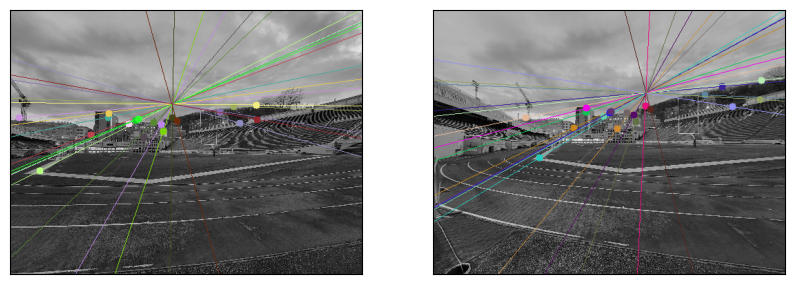

In [40]:
# Use brute force to match
matches = brute.knnMatch(descriptors1, descriptors2, k=2)

pts1 = []
pts2 = []

# Perform Lowe's ratio test and find fundamental matrix
for (m,n) in matches:
    if m.distance < 0.6 * n.distance:
        pts2.append(keypoints2[m.trainIdx].pt)
        pts1.append(keypoints1[m.queryIdx].pt)

pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
F, mask = cv.findFundamentalMat(pts1,pts2,cv.FM_LMEDS)

# Select only inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

def drawlines(img1,img2,lines,pts1,pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    r,c = img1.shape
    img1 = cv.cvtColor(img1, cv.COLOR_GRAY2BGR)
    img2 = cv.cvtColor(img2, cv.COLOR_GRAY2BGR)
    for r,pt1,pt2 in zip(lines, pts1, pts2):
        color = tuple(np.random.randint(0, 255, 3).tolist())
        x0,y0 = map(int, [0, -r[2] / r[1]])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c) / r[1]])
        img1 = cv.line(img1, (x0, y0), (x1, y1), color, 1)
        img1 = cv.circle(img1, tuple(pt1), 5, color, -1)
        img2 = cv.circle(img2, tuple(pt2), 5, color, -1)
    return img1, img2


# drawing epilines lines on left image
lines1 = cv.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2, F)
lines1 = lines1.reshape(-1,3)
img5,_ = drawlines(img1,img2,lines1,pts1,pts2)

# drawing epilines on right image
lines2 = cv.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1, F)
lines2 = lines2.reshape(-1,3)
img3,_ = drawlines(img2,img1,lines2,pts2,pts1)

# Show Results
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(img5), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(img3), plt.xticks([]), plt.yticks([])
plt.show()

#### Extract Patch and Match Patch

In [41]:
idx = 5 # Index of the extracted keypoint

## Extract Patch ##
# keypoint in the left image which has a correct match in the right image, and is on the corresponding epipolar line
keypoint1 = pts1[idx]

## Extract 5x5 Patch around keypoint ##
x_left, x_right = keypoint1[0] - (5 - 5 // 2), keypoint1[0] + (5 // 2)
y_down, y_up = keypoint1[1] - (5 - 5 // 2), keypoint1[1] + (5 // 2)

target_patch = img1[y_down:y_up, x_left:x_right]
# print(target_patch)


## Match Patch ##
# Find end points of the corresponding epipolar line
x0,y0 = map(int, [0, -lines2[idx][2] / lines2[idx][1]])
x1,y1 = map(int, [img2.shape[1], -(lines2[idx][2]+lines2[idx][0] * img2.shape[1]) / lines2[idx][1]])

# line function to get line coordinates
line_coords = list(zip(*line(*(x0, y0), *(x1, y1))))

# Extract patches along line
patch_list = []
for coord in line_coords:
    if img2.shape[1]-2 >= coord[0] and coord[0] >= 3 and img2.shape[0]-3 >= coord[1] and coord[1] >= 2:
        x_left, x_right = coord[0] - (5 - 5 // 2), coord[0] + (5 // 2)
        y_down, y_up = coord[1] - (5 - 5 // 2), coord[1] + (5 // 2)
        patch_list.append(img2[y_down:y_up, x_left:x_right])

# Normalized cross-correlation metric or matching
maximums = []
index = 0
for i, patch in enumerate(patch_list):
    res = cv.matchTemplate(patch, target_patch, cv.TM_CCORR_NORMED)
    _, maximum, _, _ = cv.minMaxLoc(res) # the best matches can be found as global maximums
    maximums.append(maximum)

global_max = max(maximums)
index = maximums.index(global_max)
best_match = patch_list[index]
matched_coord = line_coords[index] # the center coordinate of the matched patch


## Results ##
print("coord:", matched_coord)
print('## Target Patch ##')
print(target_patch)
print('## Best Match ##')
print(best_match)

coord: (244, 157)
## Target Patch ##
[[169 171 172 172 173]
 [172 173 171 169 172]
 [ 53  48  49  52  53]
 [ 57  67  77  73  90]
 [ 71 102  74   9  71]]
## Best Match ##
[[173 172 175 175 177]
 [175 176 174 175 175]
 [104  81  68  65  65]
 [ 78  84  80  80  82]
 [ 90 108 100  54  73]]


#### Visualization

NCC: 0.9908011555671692


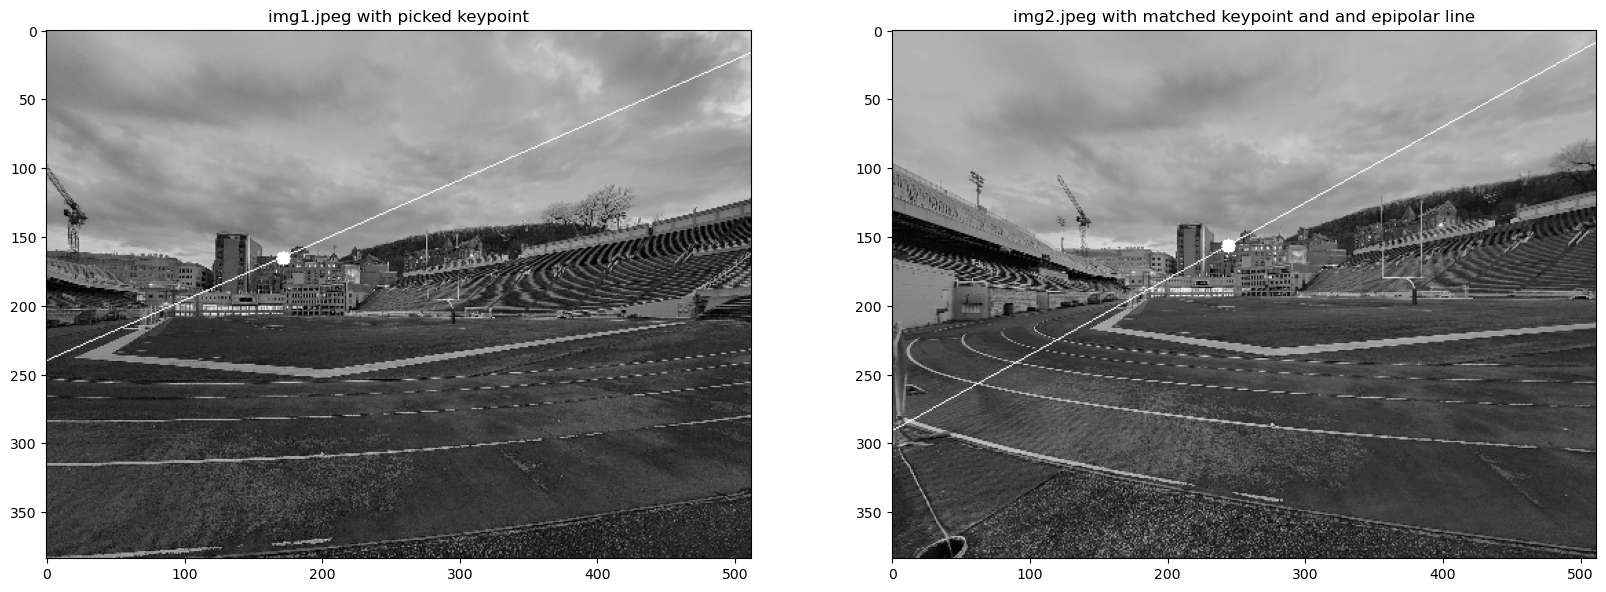

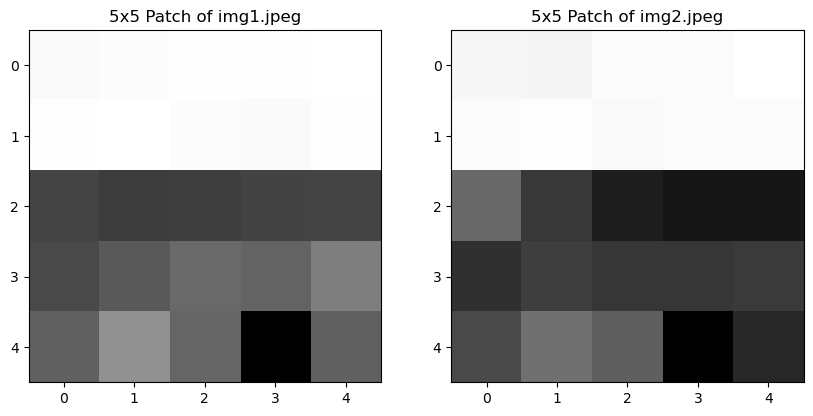

In [42]:
color = (255, 0, 0)
plt.figure(figsize=(20, 20))

target = target_patch.copy()
exper= best_match.copy()

## img1 ##
# get start and end of epipolar line in interest
x0, y0 = map(int, [0, -lines1[idx][2] / lines1[idx][1]])
x1, y1 = map(int, [img1.shape[1], -(lines1[idx][2]+lines1[idx][0] * img1.shape[1]) / lines1[idx][1]])

# Visualize
img1_anno = cv.circle(img1, keypoint1, 5, color, -1)
img1_anno = cv.line(img1_anno, (x0, y0), (x1, y1), color, 1)
plt.subplot(1, 2, 1)
plt.imshow(img1_anno, cmap='gray')
plt.title('img1.jpeg with picked keypoint')


## img2 ##
# get start and end of epipolar line in interest
x0, y0 = map(int, [0, -lines2[idx][2] / lines2[idx][1]])
x1, y1 = map(int, [img2.shape[1], -(lines2[idx][2]+lines2[idx][0] * img2.shape[1]) / lines2[idx][1]])

# Visualize Match
img2_anno = cv.line(img2, (x0, y0), (x1, y1), color, 1)
img2_anno = cv.circle(img2_anno, matched_coord, 5, color, -1)
plt.subplot(1, 2, 2)
plt.imshow(img2_anno, cmap='gray')
plt.title('img2.jpeg with matched keypoint and and epipolar line')

# Visualize Patches
plt.figure(figsize=(10, 20))
plt.subplot(1, 2, 1)
plt.imshow(target, cmap='gray')
plt.title('5x5 Patch of img1.jpeg')
plt.subplot(1, 2, 2)
plt.imshow(exper, cmap='gray')
plt.title('5x5 Patch of img2.jpeg')
print("NCC:", global_max)

#### Plot Normalized Cross-Correlation Values Against Indices of the Patch in the Left Image

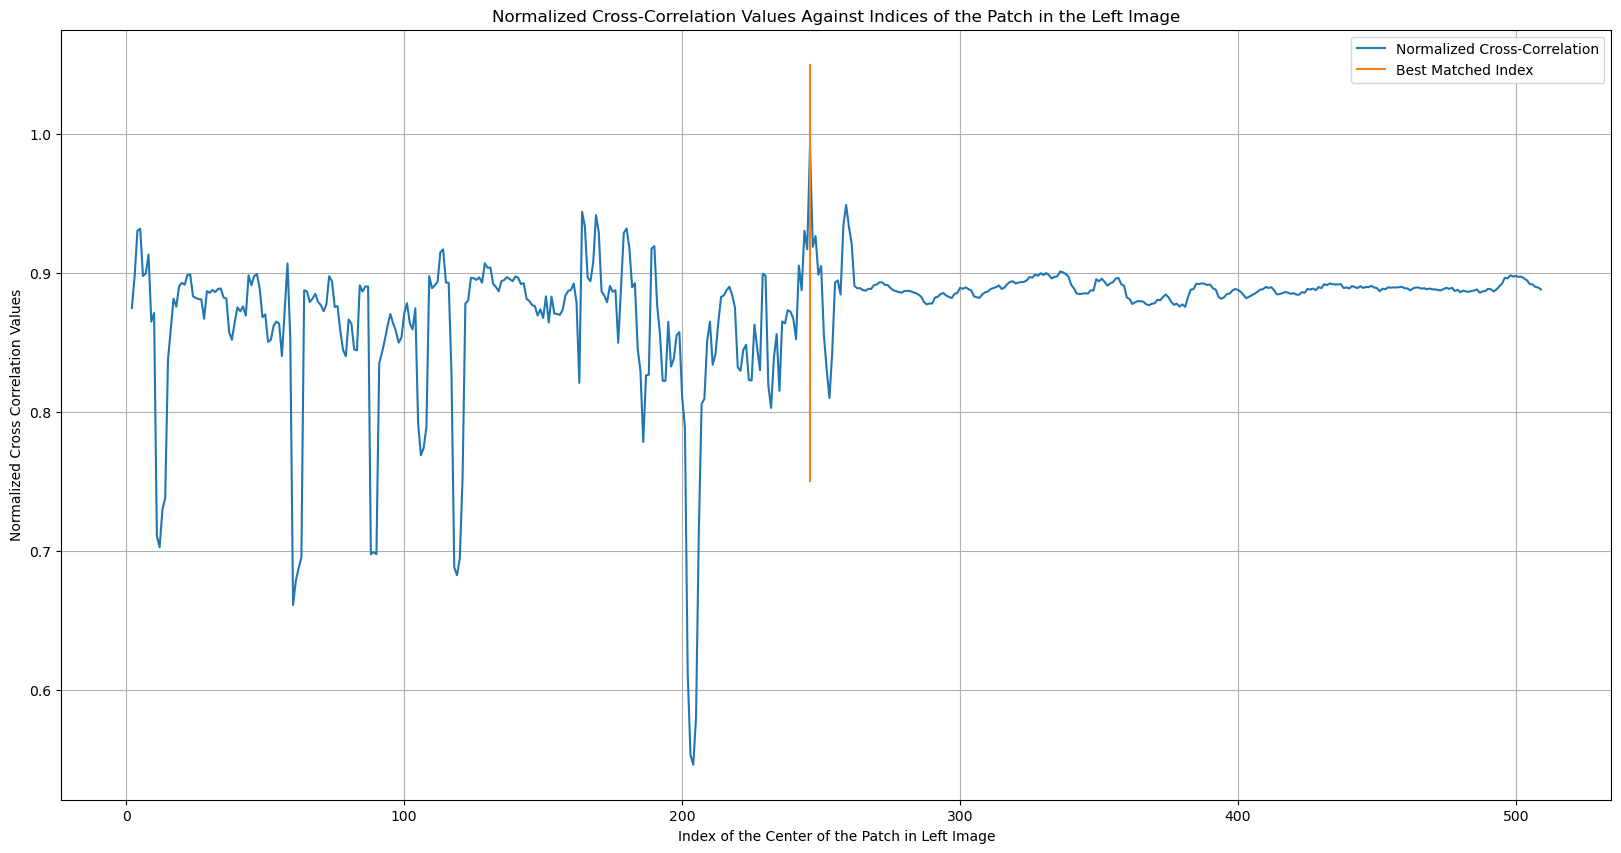

Best Matched NCC value: 0.9908011555671692
The index with the best match is: 244


In [51]:
x = range(5 // 2, img1.shape[1] - 5 // 2)
best_list = [index+2 for i in range(len(x))] # shift by 2 due to list nature


## Plot ##
plt.figure(figsize=(20,10))

plt.plot(x, maximums)
plt.plot(best_list, np.linspace(0.75, 1.05, len(x)))
plt.title("Normalized Cross-Correlation Values Against Indices of the Patch in the Left Image")
plt.xlabel("Index of the Center of the Patch in Left Image")
plt.ylabel("Normalized Cross Correlation Values")

plt.grid()
plt.legend(['Normalized Cross-Correlation', 'Best Matched Index'])
plt.show()

print("Best Matched NCC value:", global_max)
print("The index with the best match is:", index)

## Answers to Questions
1. Are the matching points you found the correct ones? Explain.
* The matching point I found was correct, as seen in the keypoint overlay visualization and patch visualization. Although the pixel values do not match exactly, it is to be expected since the two images are different. My custom method of finding the match is theoretically accurate, and it performs well. I  find all coordinates on the corresponding epipolar line in the right image, and extract the 5x5 patch around each coordinate. cv2.matchTemplate() uses NCC metric to compare the patch to the original patch, and find the patch with the highest matching score. With this method, the best matching patch can be found, and with the varying elements in the image, the algorithm can find the best matching patch.

## Problem 3: Motion Algorithm

#### Extract Corners using Harris Corner Detection Algorithm

C:\Users\monaw\AppData\Local\Temp\ipykernel_69928\1918506469.py:32: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  p1_1 = np.int0(cv.goodFeaturesToTrack(frame1, **F_ARGS1))
C:\Users\monaw\AppData\Local\Temp\ipykernel_69928\1918506469.py:33: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  p1_2 = np.int0(cv.goodFeaturesToTrack(frame1, **F_ARGS2))
C:\Users\monaw\AppData\Local\Temp\ipykernel_69928\1918506469.py:34: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  p1_3 = np.int0(cv.goodFeaturesToTrack(frame1, **F_ARGS3))
C:\Users\monaw\AppData\Local\Temp\ipykernel_69928\1918506469.py:35: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  p1_4 = np.int0(cv.goodFeaturesToTrack(frame1, **F_ARGS4))


Text(0.5, 1.0, 'Good Features by Harris Corner Detection Algorithm. Args: qualityLevel 0.01, minDistance 10')

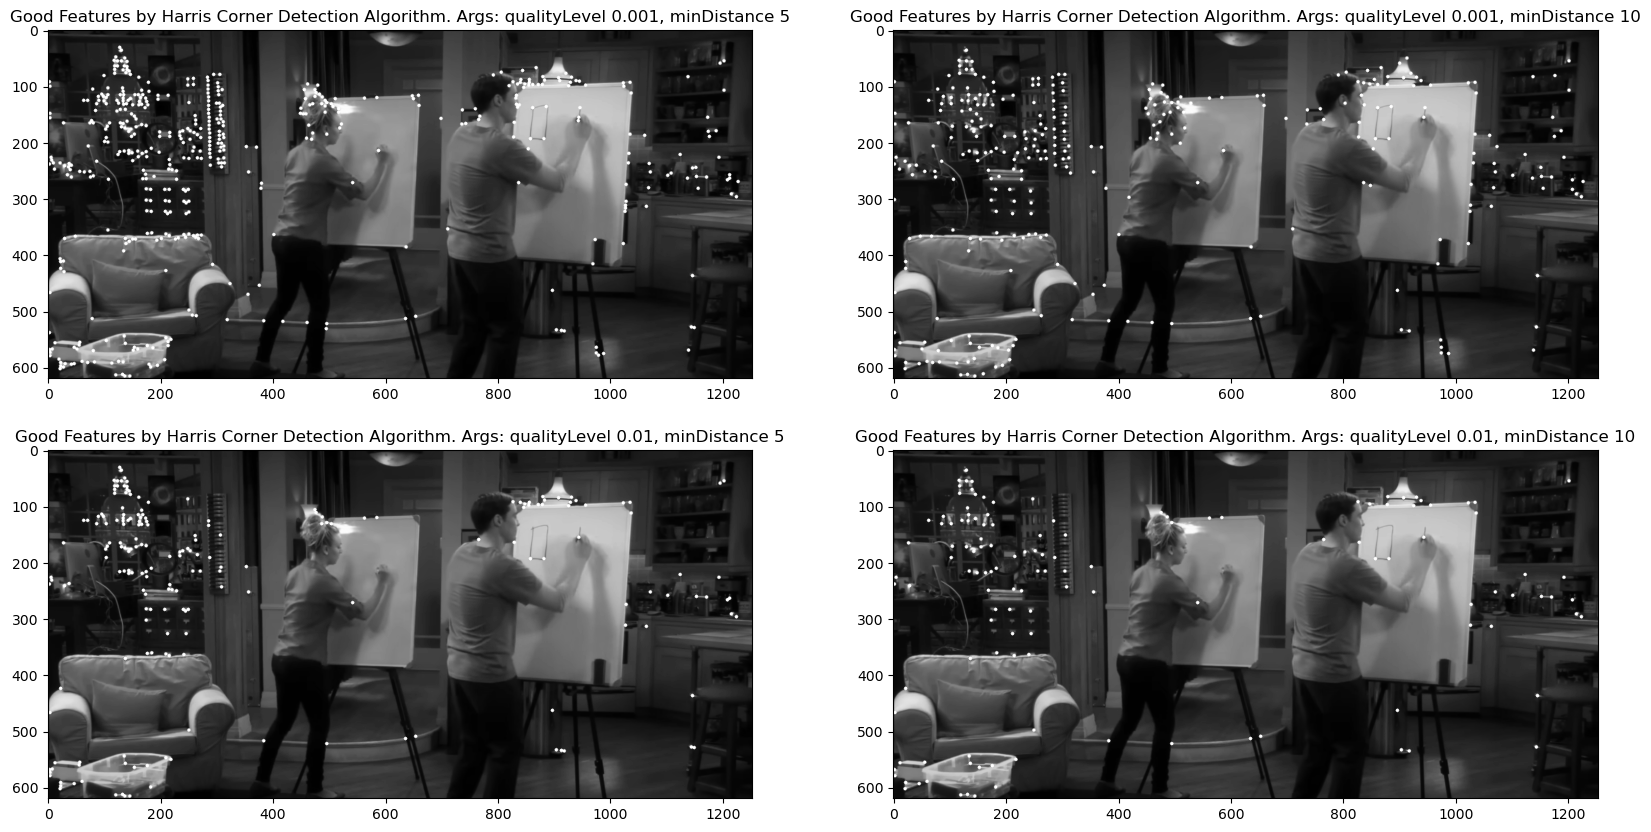

In [4]:
## Load Image ##
frame1 = cv.cvtColor(cv.imread(os.path.join(path, 'frame1.png')), cv.COLOR_BGR2GRAY)
frame2 = cv.resize(
                    cv.cvtColor(
                                cv.imread(os.path.join(path, 'frame2.png')), 
                                cv.COLOR_BGR2GRAY), 
                    (frame1.shape[1], frame1.shape[0])) # resize the second image to the size of the first


# Extract Good Features
F_ARGS1 = {'maxCorners': 500, 
          'qualityLevel': 0.001, 
          'minDistance': 5, 
          'useHarrisDetector': True
          }
F_ARGS2 = {'maxCorners': 500, 
          'qualityLevel': 0.001, 
          'minDistance': 10, 
          'useHarrisDetector': True
          }
F_ARGS3 = {'maxCorners': 500, 
          'qualityLevel': 0.01, 
          'minDistance': 5, 
          'useHarrisDetector': True
          }
F_ARGS4 = {'maxCorners': 500, 
          'qualityLevel': 0.01, 
          'minDistance': 10, 
          'useHarrisDetector': True
          }

p1_1 = np.int0(cv.goodFeaturesToTrack(frame1, **F_ARGS1))
p1_2 = np.int0(cv.goodFeaturesToTrack(frame1, **F_ARGS2))
p1_3 = np.int0(cv.goodFeaturesToTrack(frame1, **F_ARGS3))
p1_4 = np.int0(cv.goodFeaturesToTrack(frame1, **F_ARGS4))

img_1 = frame1.copy()
for i in p1_1:
    x,y = i.ravel()
    cv.circle(img_1,(x,y),3,255,-1)

img_2 = frame1.copy()
for i in p1_2:
    x,y = i.ravel()
    cv.circle(img_2,(x,y),3,255,-1)

img_3 = frame1.copy()
for i in p1_3:
    x,y = i.ravel()
    cv.circle(img_3,(x,y),3,255,-1)

img_4 = frame1.copy()
for i in p1_4:
    x,y = i.ravel()
    cv.circle(img_4,(x,y),3,255,-1)

# Visualize the corners
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.imshow(img_1, cmap='gray')
plt.title('Good Features by Harris Corner Detection Algorithm. Args: qualityLevel 0.001, minDistance 5')

plt.subplot(222)
plt.imshow(img_2, cmap='gray')
plt.title('Good Features by Harris Corner Detection Algorithm. Args: qualityLevel 0.001, minDistance 10')

plt.subplot(223)
plt.imshow(img_3, cmap='gray')
plt.title('Good Features by Harris Corner Detection Algorithm. Args: qualityLevel 0.01, minDistance 5')

plt.subplot(224)
plt.imshow(img_4, cmap='gray')
plt.title('Good Features by Harris Corner Detection Algorithm. Args: qualityLevel 0.01, minDistance 10')

As minDistance increases, less points pass the threshold. As qualityLevel increases, less points are presented. Args qualityLevel 0.001, minDistance 10 seems to capture good amount of edges.

#### Compute Optical Flow

Text(0.5, 1.0, 'frame2.png')

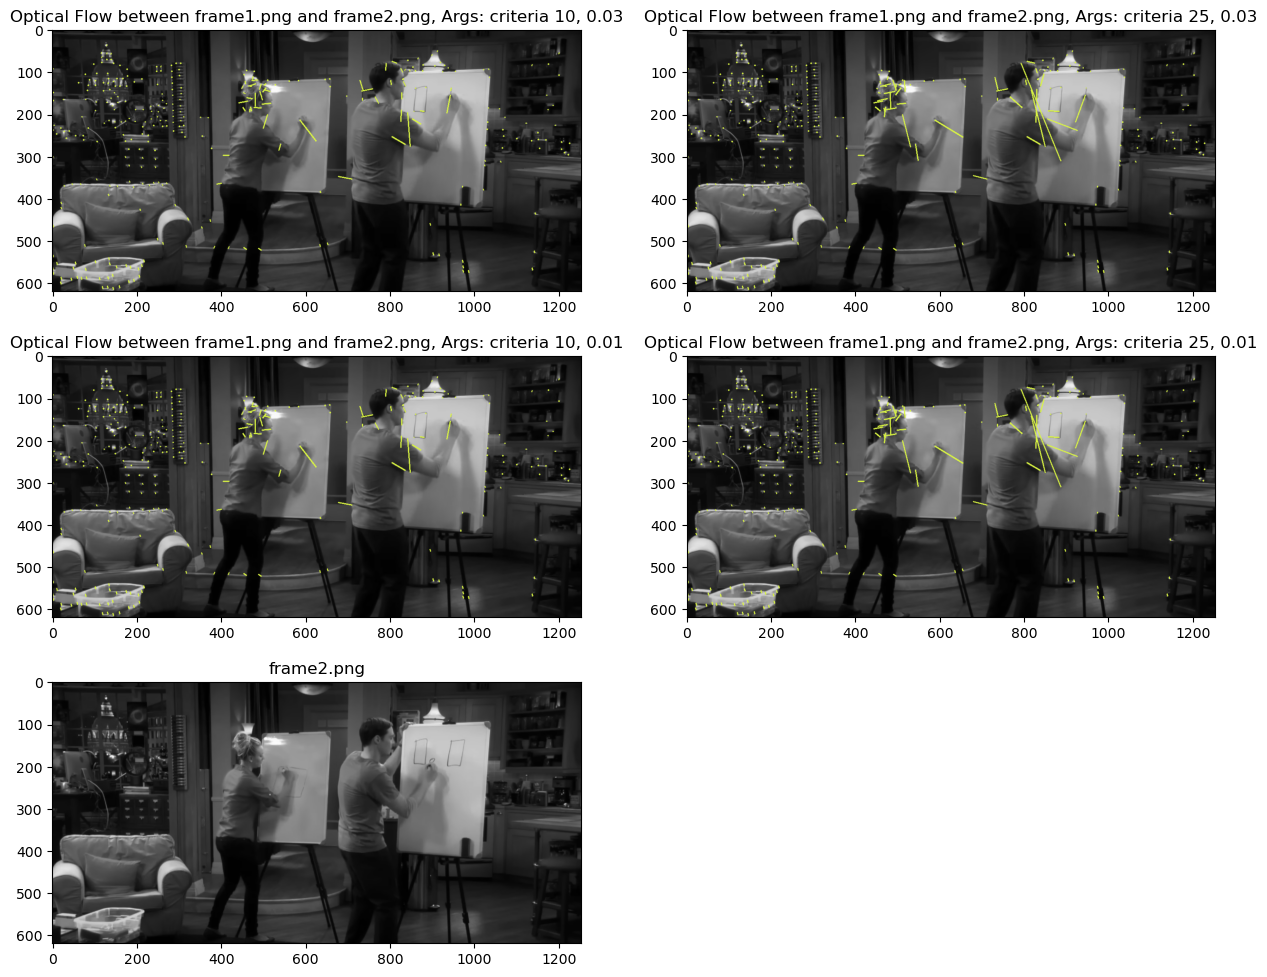

In [5]:
# Choose which set of features to use
p1 = p1_2


## Define Args ##
LK_ARGS1 = {'winSize': (15, 15),
           'maxLevel': 1, 
           'criteria': (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 0.03)
           }

LK_ARGS2 = {'winSize': (15, 15),
           'maxLevel': 1, 
           'criteria': (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 25, 0.03)
           }

LK_ARGS3 = {'winSize': (15, 15),
           'maxLevel': 1, 
           'criteria': (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 0.01)
           }

LK_ARGS4 = {'winSize': (15, 15),
           'maxLevel': 1, 
           'criteria': (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 25, 0.01)
           }

p = p1.astype(np.float32)
color = (218, 245, 66)


p2_1, status1, error1 = cv.calcOpticalFlowPyrLK(frame1, frame2, p, None, **LK_ARGS1)
p2_2, status2, error2 = cv.calcOpticalFlowPyrLK(frame1, frame2, p, None, **LK_ARGS2)
p2_3, status3, error3 = cv.calcOpticalFlowPyrLK(frame1, frame2, p, None, **LK_ARGS3)
p2_4, status4, error4 = cv.calcOpticalFlowPyrLK(frame1, frame2, p, None, **LK_ARGS4)
img_one = cv.cvtColor(frame1.copy(), cv.COLOR_GRAY2BGR)
# draw the tracks 
for i, (second, first) in enumerate(zip(p2_1, p1)):
    x0, y0 = list(map(int, first.ravel()))
    x1, y1 = list(map(int, second.ravel()))
    img_one = cv.line(img_one, (x0, y0), (x1, y1), color, 2)

img_two = cv.cvtColor(frame1.copy(), cv.COLOR_GRAY2BGR)
# draw the tracks 
for i, (second, first) in enumerate(zip(p2_2, p1)):
    x0, y0 = list(map(int, first.ravel()))
    x1, y1 = list(map(int, second.ravel()))
    img_two = cv.line(img_two, (x0, y0), (x1, y1), color, 2)

img_three = cv.cvtColor(frame1.copy(), cv.COLOR_GRAY2BGR)
# draw the tracks 
for i, (second, first) in enumerate(zip(p2_3, p1)):
    x0, y0 = list(map(int, first.ravel()))
    x1, y1 = list(map(int, second.ravel()))
    img_three = cv.line(img_three, (x0, y0), (x1, y1), color, 2)

img_four = cv.cvtColor(frame1.copy(), cv.COLOR_GRAY2BGR)
# draw the tracks 
for i, (second, first) in enumerate(zip(p2_4, p1)):
    x0, y0 = list(map(int, first.ravel()))
    x1, y1 = list(map(int, second.ravel()))
    img_four = cv.line(img_four, (x0, y0), (x1, y1), color, 2)


## Visualization ##
plt.figure(figsize=(15, 12))
plt.subplot(321)
plt.imshow(img_one)
plt.title('Optical Flow between frame1.png and frame2.png, Args: criteria 10, 0.03')

plt.subplot(322)
plt.imshow(img_two)
plt.title('Optical Flow between frame1.png and frame2.png, Args: criteria 25, 0.03')

plt.subplot(323)
plt.imshow(img_three)
plt.title('Optical Flow between frame1.png and frame2.png, Args: criteria 10, 0.01')

plt.subplot(324)
plt.imshow(img_four)
plt.title('Optical Flow between frame1.png and frame2.png, Args: criteria 25, 0.01')

plt.subplot(325)
plt.imshow(cv.cvtColor(frame2, cv.COLOR_GRAY2BGR))
plt.title('frame2.png')

The second and third elements of the criteria seems to determine the strength and direction of the optical flow. I will use Args: criteria 10, 0.03 from now on

(Text(0.5, 0, 'Pyramid Level'), Text(0, 0.5, 'Mean Error'))

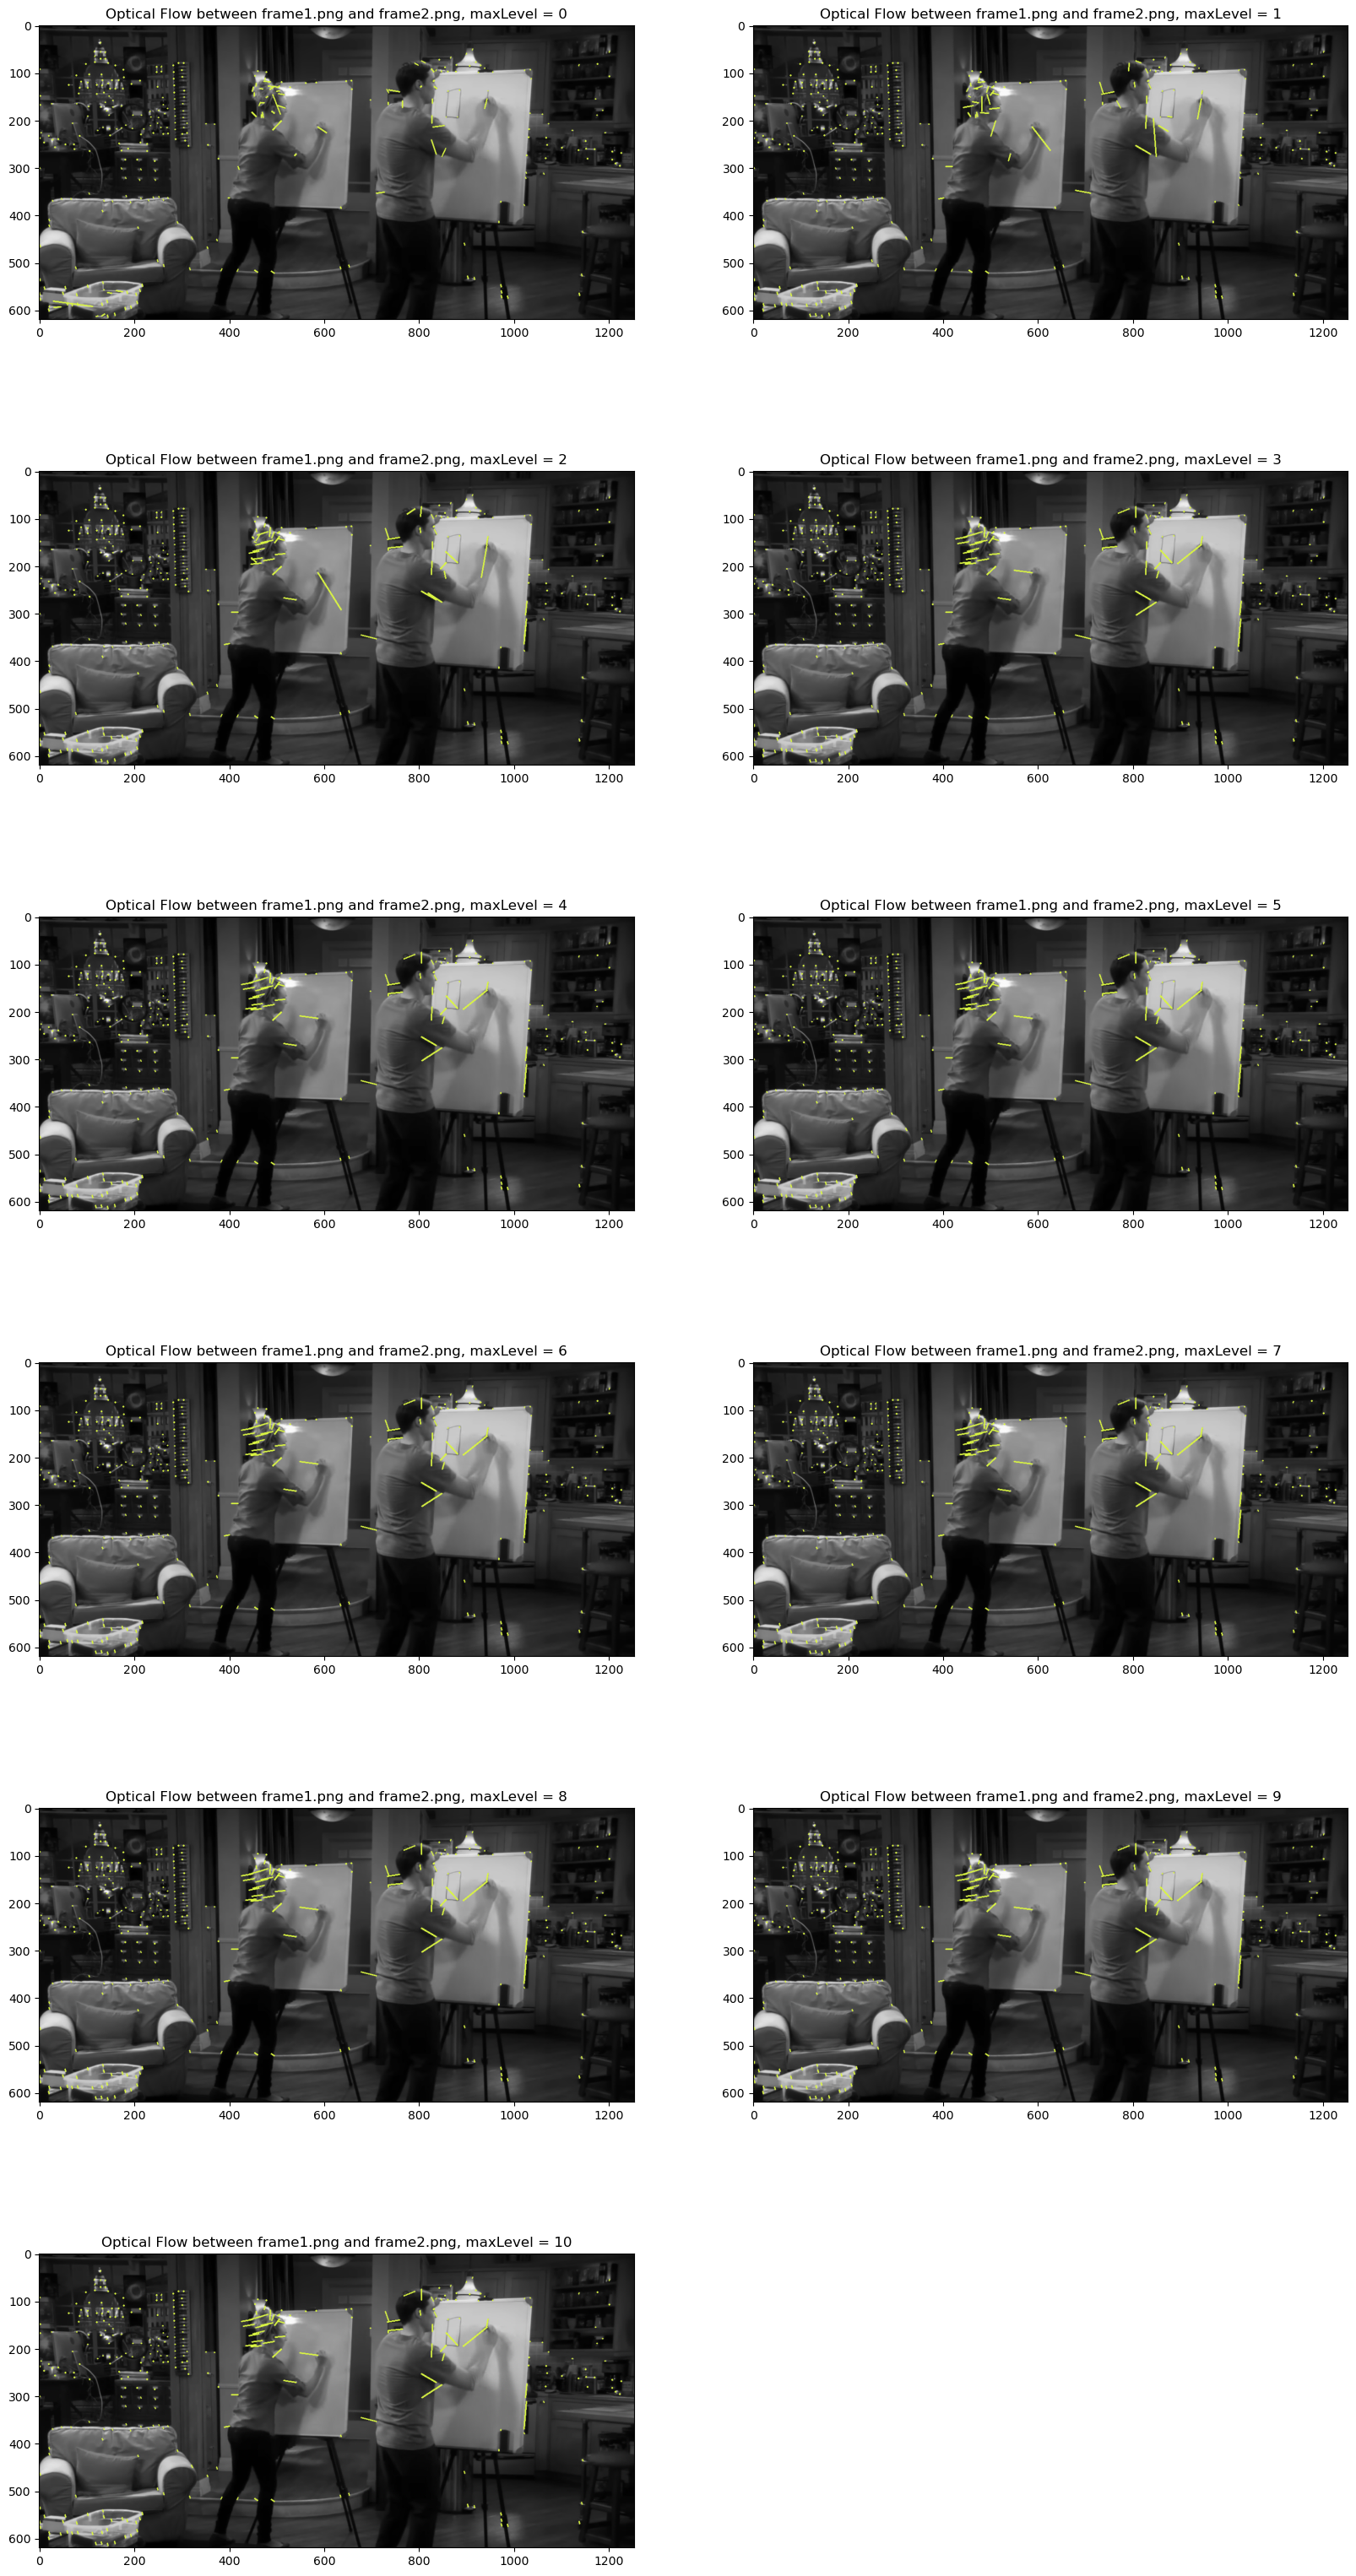

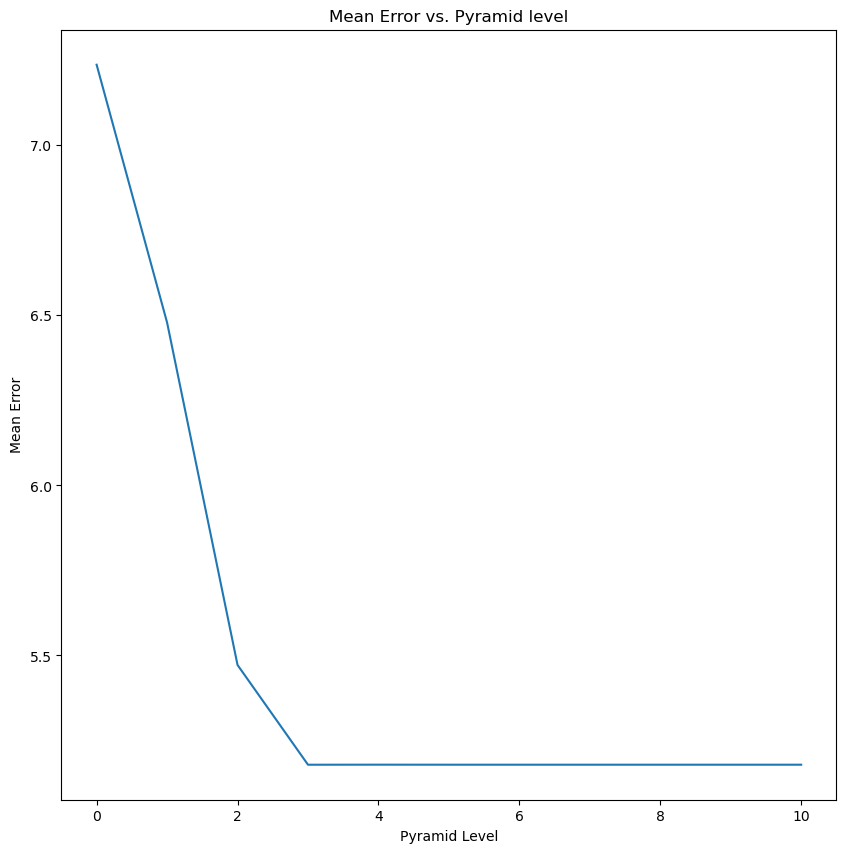

In [7]:
## Varying Max Pyramid Level ##

plt.figure(figsize=(20, 40))
mean_list = []

for level in range(11):
    LK_ARGS = {'winSize': (15, 15),
           'maxLevel': level, 
           'criteria': (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 0.03)
           }
    
    p2, status, error = cv.calcOpticalFlowPyrLK(frame1, frame2, p, None, **LK_ARGS)

    # Calculate the Mean Errors
    good_errors = error[status == 1]
    mean = sum(good_errors) / len(good_errors)
    mean_list.append(mean)

    img = cv.cvtColor(frame1.copy(), cv.COLOR_GRAY2BGR)

    # draw the tracks 
    for i, (second, first) in enumerate(zip(p2, p1)):
        color = (218, 245, 66)
        x0, y0 = list(map(int, first.ravel()))
        x1, y1 = list(map(int, second.ravel()))
        img = cv.line(img, (x0, y0), (x1, y1), color, 2)
    
    plt.subplot(6, 2, level + 1)
    plt.imshow(img)
    plt.title(f'Optical Flow between frame1.png and frame2.png, maxLevel = {level}')

## Plot the Mean Error versus Pyramid Level ##
plt.figure(figsize=(10,10))
plt.plot(range(0, 11), mean_list)
plt.title('Mean Error vs. Pyramid level')
plt.xlabel('Pyramid Level'), plt.ylabel('Mean Error')

## Answers to Questions
1. Discuss the trends you observe in the plot.
* As the maximum pyramid level increases, the mean error decreases. This makes sense because in LK, as pyramid level increases, the image resolution decreases, and the movement from one frame to the next is more easily identifiable.

---
1. Comment on the quality of the results.
* As seen on the plot, at the third level, the mean error has reached the lowest value. Seen in the optical flow image with a max level of 3, the optical flow are pointing in the correct direction through a visual inspection. This good result is consistent throughout higher pyramid levels, which is consistent with the trend observed in the plot.